IMPORTANT LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


IMPORTING DATASET

In [3]:
df = pd.read_csv('./voice.csv')

DATA EXPLORATION

In [4]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [5]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [7]:
df.shape

(3168, 21)

In [8]:
df.label

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

ENCODING TARGET VALUES (1: MALE, 0: FEMALE)

In [9]:
encoding_columns = [ "label"]
Encoder = LabelEncoder()
for column in encoding_columns :
    print("column",column )
    df[ column ] = Encoder.fit_transform(tuple(df[ column ]))

column label


In [10]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


FEATURE SELECTION

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

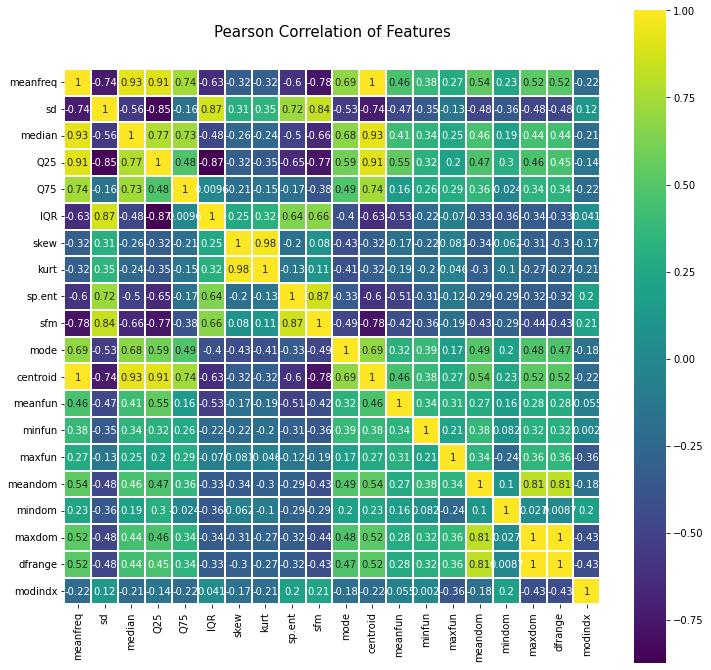

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [12]:
#While looking at the plot, we can figure out some interesting correlations.
#If you look at meanfreq vs centroid their correlation is maximum possible value of 1. 
#Same is the case with maxdom and dfrange.
#So essentially we could filter out these features and still get an equivalent performance as they aren't adding any new information.

In [13]:
df = df.drop('centroid',axis=1)

In [14]:
df = df.drop('maxdom',axis=1)

In [15]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.182790,0.083770,0.262295,0.832899,0.007812,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.188980,0.034409,0.275862,0.909856,0.039062,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.209918,0.039506,0.275862,0.494271,0.007812,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.172375,0.034483,0.250000,0.791360,0.007812,3.585938,0.311002,0


SPLITTING DATA INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT

In [16]:
x = df.drop("label",axis=1)
y = df["label"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [18]:
X_test.shape

(951, 18)

In [19]:
X_train

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,dfrange,modindx
1876,0.191702,0.044968,0.190568,0.161158,0.217378,0.056220,1.936982,7.971063,0.910712,0.279577,0.176463,0.157803,0.016244,0.271186,0.977163,0.140625,6.859375,0.220856
1564,0.156585,0.062116,0.129479,0.110303,0.220606,0.110303,3.309047,18.955519,0.921257,0.482695,0.111830,0.115959,0.024814,0.270270,0.408529,0.083008,0.781250,0.481579
2336,0.235686,0.038506,0.242192,0.229041,0.258630,0.029589,2.779985,11.392185,0.818772,0.204903,0.249315,0.175759,0.047105,0.279070,1.828125,0.257812,9.257812,0.138608
308,0.196418,0.057498,0.196041,0.142463,0.252493,0.110029,2.610695,13.261627,0.893888,0.184081,0.000000,0.132980,0.031250,0.246154,0.249496,0.007812,0.546875,0.310714
2844,0.224698,0.033298,0.226417,0.218011,0.237974,0.019962,3.128295,13.756715,0.791817,0.184991,0.221689,0.189976,0.054237,0.269663,1.580915,0.234375,8.250000,0.135866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0.194937,0.034404,0.194902,0.181863,0.208971,0.027108,3.031623,13.742295,0.848110,0.254253,0.197647,0.169901,0.051064,0.279070,2.174665,0.023438,13.242188,0.106637
2347,0.225288,0.034083,0.228538,0.212735,0.247178,0.034443,2.113890,7.525178,0.846499,0.203654,0.215166,0.166322,0.047666,0.271186,1.545410,0.023438,10.101562,0.139000
1608,0.122706,0.085216,0.145739,0.032031,0.199123,0.167092,1.483382,4.788478,0.941022,0.620471,0.193518,0.187219,0.032787,0.238806,0.610609,0.015625,3.757812,0.190460
2541,0.197540,0.034775,0.198684,0.182661,0.218712,0.036052,2.459397,9.567449,0.839523,0.226977,0.185064,0.173636,0.047013,0.271186,1.614746,0.210938,15.023438,0.038962


In [20]:
y_train

1876    0
1564    1
2336    0
308     1
2844    0
       ..
2514    0
2347    0
1608    0
2541    0
2575    0
Name: label, Length: 2217, dtype: int64

TRAINING MACHINE LEARNING MODEL

In [21]:
cat = CatBoostClassifier()
randomforest =RandomForestClassifier()
xgb = XGBClassifier()
lgr = LogisticRegression()


In [22]:
estimator = []
estimator.append(('catboost',cat))
estimator.append(('randomforest',randomforest))
estimator.append(('xgb',xgb))
estimator.append(('lgr',lgr))

In [23]:
voting = VotingClassifier(estimators= estimator,voting ='soft')
voting.fit(X_train,y_train)

Learning rate set to 0.014474
0:	learn: 0.6624046	total: 49.2ms	remaining: 49.2s
1:	learn: 0.6375824	total: 50.7ms	remaining: 25.3s
2:	learn: 0.6129982	total: 52ms	remaining: 17.3s
3:	learn: 0.5900226	total: 53.4ms	remaining: 13.3s
4:	learn: 0.5676549	total: 54.7ms	remaining: 10.9s
5:	learn: 0.5442407	total: 56ms	remaining: 9.28s
6:	learn: 0.5249511	total: 57.4ms	remaining: 8.14s
7:	learn: 0.5037783	total: 58.7ms	remaining: 7.28s
8:	learn: 0.4822264	total: 60.1ms	remaining: 6.62s
9:	learn: 0.4648875	total: 61.5ms	remaining: 6.09s
10:	learn: 0.4471116	total: 63ms	remaining: 5.66s
11:	learn: 0.4293237	total: 64.3ms	remaining: 5.29s
12:	learn: 0.4169083	total: 65.6ms	remaining: 4.98s
13:	learn: 0.4024772	total: 67ms	remaining: 4.72s
14:	learn: 0.3858302	total: 68.3ms	remaining: 4.49s
15:	learn: 0.3720672	total: 69.7ms	remaining: 4.29s
16:	learn: 0.3588849	total: 71.2ms	remaining: 4.12s
17:	learn: 0.3492468	total: 72.5ms	remaining: 3.96s
18:	learn: 0.3397932	total: 73.9ms	remaining: 3.82s


/home/sparsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f6089b51660>),
                             ('randomforest', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=No...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat

EVALUATING TRAINED MACHINE LEARNING MODEL

In [24]:
y_pred = voting.predict(X_test)

In [25]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.9789695057833859

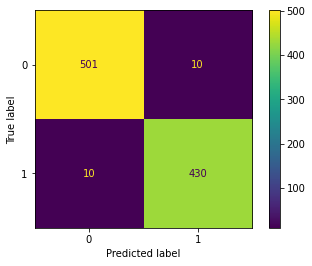

In [28]:
t = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= t, display_labels= voting.classes_)
disp.plot()

EXPORTING TRAINED ML MODEL FOR FRONT_END

In [29]:
import pickle

In [30]:
file_name = 'finalized_model.sav'
pickle.dump(voting, open(file_name,'wb'))

In [31]:
loaded_model = pickle.load(open('finalized_model.sav', 'rb'))

RECORDING VOICE AND RECOGNISING GENDER IN REAL-TIME

In [32]:
import sounddevice as sd
from scipy.io.wavfile import write
from scipy.io import wavfile
import numpy as np

In [33]:
fs = 44100  # Sample rate
seconds = 3  # Duration of recording

In [34]:
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
print("Speak Now")
sd.wait()  # Wait until recording is finished
print("Recording Done!")
write('output.wav', fs, myrecording)  # Save as WAV file 

Speak Now
Recording Done!


In [35]:
import os

In [36]:
os.system('Rscript extractor_feature.r')

Warning message:
In (0:(n - 1)) * f : NAs produced by integer overflow


0

In [37]:
voice = pd.read_csv('my_voice.csv')

In [38]:
#columns_scaling = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"]
#voice[columns_scaling] = MinMaxScaler().fit_transform(voice[columns_scaling])

In [39]:
voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.150715,0.093451,0.135161,0.116138,0.255304,0.139166,9.159192,130.723983,0.841195,0.368963,0,0.150715,0.131587,0.043151,0.279114,0.069255,0,0.624463,0.624463,0.092672


In [40]:
voice = voice.drop('centroid',axis=1)

In [41]:
voice = voice.drop('maxdom',axis=1)

In [42]:
type(voice)

pandas.core.frame.DataFrame

In [43]:
gender = voting.predict(voice)

In [44]:
if(gender[0] == 0):
    print("Female")
else:
    print("Male")

Male


In [45]:
os.system("python3 GUI_Main.py")

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
Warning message:
In (0:(n - 1)) * f : NAs produced by integer overflow


Learning rate set to 0.014476
0:	learn: 0.6624166	total: 55.9ms	remaining: 55.8s
1:	learn: 0.6377940	total: 62ms	remaining: 30.9s
2:	learn: 0.6104332	total: 68ms	remaining: 22.6s
3:	learn: 0.5876607	total: 74.5ms	remaining: 18.5s
4:	learn: 0.5653148	total: 80.8ms	remaining: 16.1s
5:	learn: 0.5433303	total: 87.5ms	remaining: 14.5s
6:	learn: 0.5244146	total: 93.2ms	remaining: 13.2s
7:	learn: 0.5031007	total: 99.4ms	remaining: 12.3s
8:	learn: 0.4852025	total: 106ms	remaining: 11.7s
9:	learn: 0.4678589	total: 113ms	remaining: 11.2s
10:	learn: 0.4497877	total: 119ms	remaining: 10.7s
11:	learn: 0.4367362	total: 128ms	remaining: 10.5s
12:	learn: 0.4240067	total: 136ms	remaining: 10.3s
13:	learn: 0.4086191	total: 143ms	remaining: 10s
14:	learn: 0.3922846	total: 149ms	remaining: 9.81s
15:	learn: 0.3779165	total: 156ms	remaining: 9.58s
16:	learn: 0.3641976	total: 163ms	remaining: 9.41s
17:	learn: 0.3543670	total: 169ms	remaining: 9.23s
18:	learn: 0.3447745	total: 176ms	remaining: 9.07s
19:	learn

/home/sparsh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0